In [21]:
# price up, volume up: when rise again from the bottom 
import pandas as pd
import numpy as np
CJSecurities=pd.read_csv('CJSecurities.csv',index_col='Date')
CJSecurities=CJSecurities.iloc[:,1:]
CJSecurities.index=pd.to_datetime(CJSecurities.index)
CJSecurities.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,10.42,10.42,10.20,10.27,54734700
2014-01-03,10.21,10.22,9.86,9.88,88544000
2014-01-06,9.88,9.97,9.71,9.80,67493100
2014-01-07,9.69,9.83,9.60,9.61,52957200
2014-01-08,9.67,9.91,9.65,9.77,55127700


/Users/IvanYe/AA.PythonQuant/candle.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  seriesData['Date']=Date


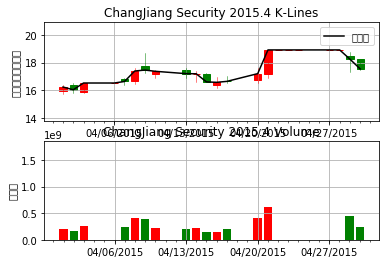

In [3]:
from candle import candleVolume
CJSecurities1=CJSecurities['2015-04-01':'2015-04-30']
candleVolume(CJSecurities1,candletitle='ChangJiang Security 2015.4 K-Lines',\
             bartitle='ChangJiang Security 2015.4 Volume')

/Users/IvanYe/AA.PythonQuant/candle.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  seriesData['Date']=Date


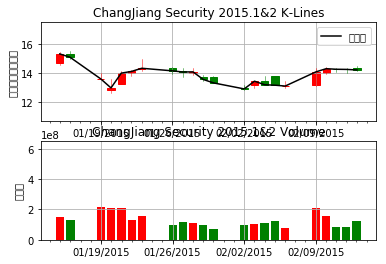

In [4]:
# price up, volume no change: when the price reach the highest location
CJSecurities2=CJSecurities['2015-01-15':'2015-02-15']
candleVolume(CJSecurities2,candletitle='ChangJiang Security 2015.1&2 K-Lines',\
            bartitle='ChangJiang Security 2015.1&2 Volume')

/Users/IvanYe/AA.PythonQuant/candle.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  seriesData['Date']=Date


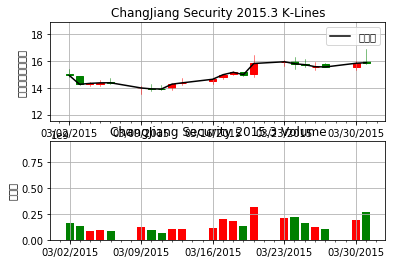

In [5]:
# price up, volume down
CJSecurities3=CJSecurities['2015-03-01':'2015-03-31']
candleVolume(CJSecurities3,candletitle='ChangJiang Security 2015.3 K-Lines',\
             bartitle='ChangJiang Security 2015.3 Volume')

In [6]:
# price no change, volume up: good news
# price no change, volume down

/Users/IvanYe/AA.PythonQuant/candle.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  seriesData['Date']=Date


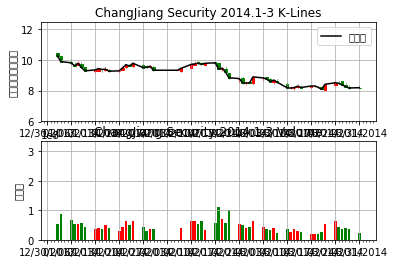

In [7]:
# price down, volume up: short position dominant
CJSecurities4=CJSecurities['2014-01-02':'2014-03-31']
candleVolume(CJSecurities4,candletitle='ChangJiang Security 2014.1-3 K-Lines',\
            bartitle='ChangJiang Security 2014.1-3 Volume')

In [8]:
# price down, volume no change: may revert
# price down, volume down: may revert

In [9]:
# example analysis
close=CJSecurities.Close
close.describe()
BreakClose=np.ceil(close/2)*2
BreakClose.name='BreakClose'
pd.DataFrame({'BreakClose':BreakClose,'Close':close}).head(n=2)

,BreakClose,Close
Date,,
2014-01-02,12.0,10.27
2014-01-03,10.0,9.88


In [11]:
volume=CJSecurities.Volume
# price change
PrcChange=close.diff()
# up cases
UpVol=volume.replace(volume[PrcChange>0],0)
UpVol[0]=0
# down cases
DownVol=volume.replace(volume[PrcChange<=0],0)
DownVol[0]=0

In [12]:
def VOblock(vol):
    return([np.sum(vol[BreakClose==x]) for x in range(6,22,2)])

In [13]:
cumUpVol=VOblock(UpVol)
cumDownVol=VOblock(DownVol)
ALLVol=np.array([cumUpVol,cumDownVol]).transpose()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  # Remove the CWD from sys.path while we load stuff.


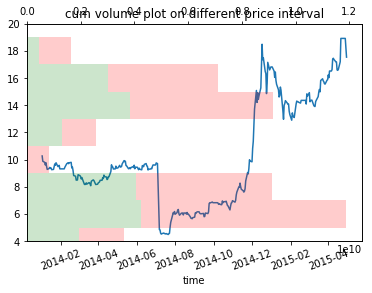

In [18]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax1=ax.twiny()
ax.plot(close)
ax.set_title('cum volume plot on different price interval')
ax.set_ylim(4,20)
ax.set_xlabel('time')
plt.setp(ax.get_xticklabels(), rotation=20,horizontalalignment='center')
ax1.barh(bottom=range(4,20,2),width=ALLVol[:,0],\
         height=2,color='g',alpha=0.2)
ax1.barh(bottom=range(4,20,2),width=ALLVol[:,1],height=2,left=ALLVol[:,0],\
        color='r',alpha=0.2)
plt.show()

In [24]:
# trading strategies
# combined with MAs
# two signals
# rolling function has ability to move time windows
volume=CJSecurities.Volume
VolSMA5=volume.rolling(5).mean().dropna()
VolSMA10=volume.rolling(10).mean().dropna()
VolSMA=((VolSMA5+VolSMA10)/2).dropna()
VolSMA.head(n=3)

Date
2014-01-15    48229480.0
2014-01-16    47371565.0
2014-01-17    44652390.0
Name: Volume, dtype: float64

In [25]:
# making volume signals
VolSignal=(volume[-len(VolSMA):]>VolSMA)*1
VolSignal[VolSignal==0]=-1
VolSignal.head()

Date
2014-01-15   -1
2014-01-16    1
2014-01-17   -1
2014-01-20   -1
2014-01-21    1
Name: Volume, dtype: int64

In [27]:
# MAs
close=CJSecurities.Close
PrcSMA5=close.rolling(5).mean().dropna()
PrcSMA20=close.rolling(20).mean().dropna()

def upbreak(Line,RefLine):
    signal=np.all([Line>RefLine,Line.shift(1)<RefLine.shift(1)],axis=0)
    return(pd.Series(signal[1:],index=Line.index[1:]))
def downbreak(Line,RefLine):
    signal=np.all([Line<RefLine,Line.shift(1)>RefLine.shift(1)],axis=0)
    return(pd.Series(signal[1:],index=Line.index[1:]))

UpSMA=upbreak(PrcSMA5[-len(PrcSMA20):],PrcSMA20)*1
DownSMA=downbreak(PrcSMA5[-len(PrcSMA20):],PrcSMA20)*1
SMAsignal=UpSMA-DownSMA
VolSignal=VolSignal[-len(SMAsignal):]
# combine two signals
signal=VolSignal+SMAsignal
signal.describe()

count    325.00000
mean      -0.12000
std        1.05163
min       -2.00000
25%       -1.00000
50%       -1.00000
75%        1.00000
max        2.00000
dtype: float64

In [28]:
signal.head()

Date
2014-01-30   -1
2014-01-31   -2
2014-02-03   -1
2014-02-05   -1
2014-02-06   -1
dtype: int64

In [29]:
signal.tail()

Date
2015-04-24   -1
2015-04-27   -1
2015-04-28   -1
2015-04-29    1
2015-04-30    1
dtype: int64

In [30]:
trade=signal.replace([2,-2,1,-1,0],[1,-1,0,0,0])
trade=trade.shift(1)[1:]
trade.head()

Date
2014-01-31    0.0
2014-02-03   -1.0
2014-02-05    0.0
2014-02-06    0.0
2014-02-07    0.0
dtype: float64

In [31]:
# compute winning rate
ret=((close-close.shift(1))/close.shift(1))['2014-01-31':]
ret.name='stockRet'
tradeRet=trade*ret
tradeRet.name='tradeRet'
winRate=len(tradeRet[tradeRet>0])/len(tradeRet[tradeRet!=0])
winRate
# it is good

0.8461538461538461

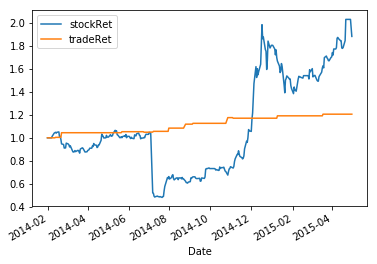

In [32]:
(1+ret).cumprod().plot(label='stockRet')
(1+tradeRet).cumprod().plot(label='tradeRet')
plt.legend()

In [33]:
# simulated account
def Hold(signal):
    hold=np.zeros(len(signal))
    for index in range(1,len(hold)):
        if hold[index-1]==0 and signal[index]==1:
            hold[index]=1
        elif hold[index-1]==1 and signal[index]==1:
            hold[index]=1
        elif hold[index-1]==1 and signal[index]==0:
            hold[index]=1
    return(pd.Series(hold,index=signal.index))

In [34]:
hold=Hold(trade)

In [35]:
def TradeSim(price,hold):
    position=pd.Series(np.zeros(len(price)),index=price.index)
    position[hold.index]=hold.values
    cash=20000*np.ones(len(price))
    for t in range(1,len(price)):
        if position[t-1]==0 and position[t]>0:
            cash[t]=cash[t-1]-price[t]*1000
        if position[t-1]>=1 and position[t]==0:
            cash[t]=cash[t-1]+price[t]*1000
        if position[t-1]==position[t]:
            cash[t]=cash[t-1]
    asset=cash+price*position*1000
    asset.name='asset'
    account=pd.DataFrame({'asset':asset,'cash':cash,'position':position})
    return(account)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11fc34f28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11fd9b160>], dtype=object)

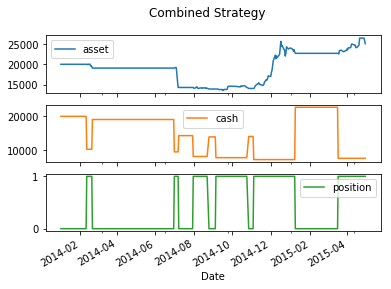

In [36]:
TradeAccount=TradeSim(close,hold)
TradeAccount.tail()
TradeAccount.plot(subplots=True,\
        title='Combined Strategy')